# Lab 2 &mdash; Fourier transform

## Submission rules:

1. The completed assignment should be prepared as a Google Colab notebook. Please make a copy of this notebook for your team. Submit the link to the notebook to **cms** and open it via UCU email address. 
2. There should be only one submission per team. However, don't forget to choose a person from your team who would submit the task, and make sure that the names of all team members are listed in the notebook. Teammates not mentioned in the notebook will not be graded for this lab.
3. This time, you also need to provide a **work breakdown structure** estimating the efforts of each team member. Please provide it at the top of your notebook. 
4. This lab requires some visualization from you; please arrange it according to best practices (appropriate axes labels, title, size/scale are a minimum).
5. The final deadline is **April 6 2023, 23:59**. Making any changes to your code after this time and date is forbidden and will be a reason for point deduction for the whole team.

#### Work breakdown :

Yaryna Fialko: Sinusoids, Loading the song, Analyzing the song: 1, 2\
Anastasiia Svets: Analyzing the song: 5, 6\
Nataliia Chaika: Analyzing the song: 3, 4 


## Introduction
Soon, you will learn about Fourier transform, i.e., an operator that maps functions depending on space (resp. time) variables into functions depending on spatial (resp. temporal) frequency, which is widely used in spectroscopy and signal processing.  

One of the motivations to use Fourier transform comes from the study of Fourier series. In our particular case, you will transform sound (a continuous wave that is a mixture of multiple frequencies) into an array of pure frequencies that can be analyzed with the help of Discrete Fourier Еransform. The ultimate goal is to decompose a melody into a sequence of pitches and then to notes (without any help of a trained musician's ear &mdash; that would be cheating!). 

In [ ]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from IPython.display import Audio, display
%matplotlib inline

## Sinusoids

Let's first consider a simple example. Decompose a series sin3 that is a sum of two sinusoids using the Fast Fourier transform from scipy library. FFT is simply a computationally efficient implementation of a discrete Fourier transform. What is the frequency of sin1 and sin2 signals?

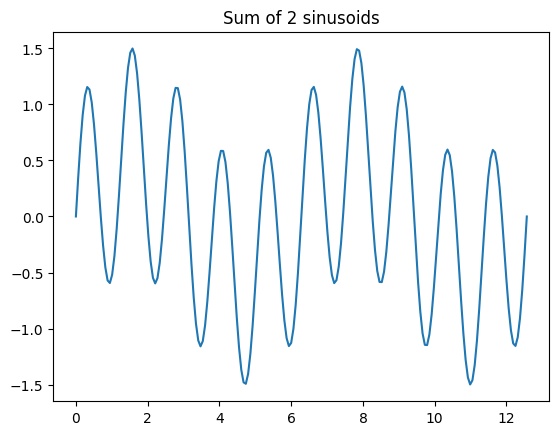

In [ ]:
x = np.linspace(0, 4*np.pi, 200)
sin1 = 0.5 * np.sin(x)
sin2 = np.sin(5*x)
sin3 = sin1 + sin2
plt.plot(x, sin3)
plt.title('Sum of 2 sinusoids')
plt.show()


Apply FFT to sin3 series to obtain frequency decomposition and plot the results.

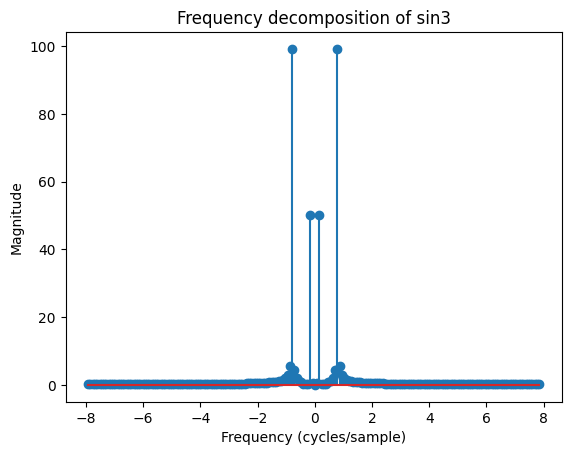

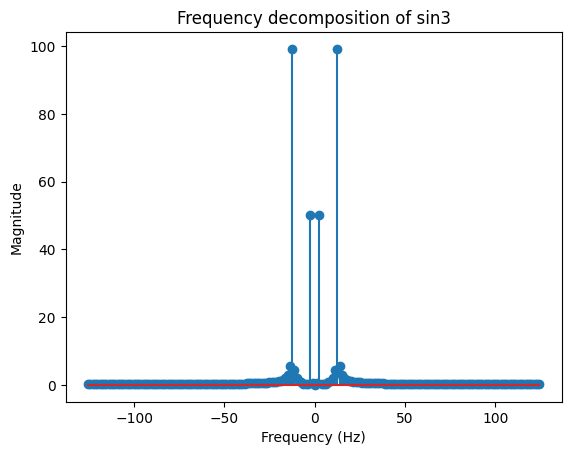

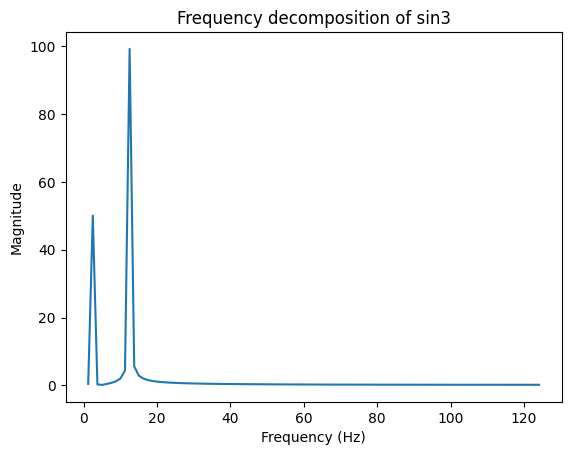

In [ ]:
# Compute the sample rate
fs = 1 / (x[1] - x[0])

# Apply the FFT to sin3
fft_vals = fft(sin3)

# Compute the corresponding frequencies
freqs = np.fft.fftfreq(len(sin3), d=x[1]-x[0])

# Plot the results
plt.stem(freqs, np.abs(fft_vals))
plt.xlabel('Frequency (cycles/sample)')
plt.ylabel('Magnitude')
plt.title('Frequency decomposition of sin3')
plt.show()


# Convert frequency to Hz
freqs_hz = freqs * fs

# Plot the results in Hz
plt.stem(freqs_hz, np.abs(fft_vals))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Frequency decomposition of sin3')
plt.show()

# Shift the zero-frequency component to the center of the spectrum
fft_vals_shifted = np.fft.fftshift(fft_vals)
freqs_shifted = np.fft.fftshift(freqs)

# Take the absolute value of the FFT and plot only the first half of the spectrum
plt.plot(freqs_shifted[len(freqs_shifted)//2+1:]*fs, np.abs(fft_vals_shifted[len(fft_vals_shifted)//2+1:]))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Frequency decomposition of sin3')
plt.show()

Make sure that you got 2 spikes corresponding to the frequencies that we assigned to the sinusoids earlier. Explain how the transformation is conducted and why we can obtain two perfectly separated frequencies from a mixed signal. 

frequency = 1/period

frequency of sin1 =  1/(4pi) = 0.159 Hz

frequenct of sin2 = 1/(4pi/5) = 0.795 Hz

The FFT is a mathematical algorithm that decomposes a signal into its frequency components. In our example, we used the FFT to decompose a mixed signal into two sinusoids of different frequencies. The reason we can obtain two perfectly separated frequencies from a mixed signal is because the FFT assumes that the signal is periodic and contains a finite number of frequency components. As long as the signal satisfies these assumptions, the FFT can accurately decompose the signal into its frequency components.


## Working with example audio

Now, let's work with a more complex wave&mdash;sound. Any sound (audio signal) can be characterized by the following three quantities: Pitch, Quality, and Loudness.

Loudness is a physiological sensation that depends mainly on the sound wave pressure (amplitude). 

The lowest note in a chord is called fundamental. It is heard predominantly due to larger intensity. Quality is determined by overtones or harmonics that add to the sound of a fundamental note.

Pitch is the frequency of a sound as perceived by human ear. A high frequency gives rise to a high pitch note and a low frequency produces a low pitch note. A pure tone is the sound of only one frequency, such as that given by a tuning fork or electronic signal generator. Naturally, music does not consist of pure tones. Depending on an instrument, technique and many other factors, sound will decay at different rates and one tone will mix with the other ones.

Thus, transcribing audio files into standard music notation (i.e., the notes) is a non-trivial task. We will focus on recognizing pitches and matching them to notes. 

### Load and explore

In [ ]:
# Load first sound from library examples
# Monophonic trumpet recording
trumpet_path = librosa.example('trumpet')
Audio(trumpet_path)

In [ ]:
trumpet_sample, trumpet_sampling_rate = librosa.load(trumpet_path)

What is a sampling rate? What does sampling rate imply about the audio? Is it sufficient for our task (according to https://en.wikipedia.org/wiki/Nyquist%E2%80%93Shannon_sampling_theorem)?


A sampling rate is the number of samples taken per second when digitizing an analog signal (such as an audio signal) to a digital signal.

It implies how much of the continuous signal is being captured and represented in digital form. A higher sampling rate means more samples are taken per second, resulting in a more accurate representation of the original signal. In contrast, a lower sampling rate can lead to loss of information and distortion of the original signal.


The sampling rate for an audio signal should be at least twice its highest frequency component to be accurately reconstructed. For most purposes, a standard CD-quality sampling rate of 44.1 kHz is sufficient for tasks such as recognizing pitches and matching them to notes.

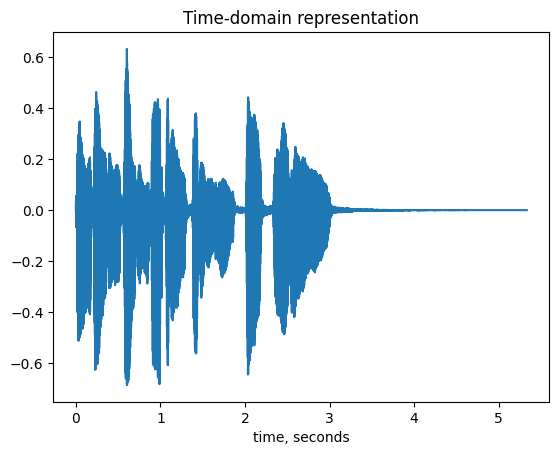

In [ ]:
# Initial visualization
time = np.array(range(trumpet_sample.shape[0])) / trumpet_sampling_rate
plt.plot(time, trumpet_sample)
plt.title('Time-domain representation')
plt.xlabel('time, seconds')
plt.show()

This visualization is called the time-domain representation of a given signal. This shows us the loudness (amplitude) of sound wave changing with time. Here amplitude = 0 represents silence. These amplitudes are not very informative as they only represent the loudness of audio recording. To better understand the audio signal, it is necessary to transform it into the frequency domain. The frequency-domain representation of a signal tells us which frequencies are present in the signal.

Decompose the trumpet samples using fft and plot the results. Observe that the frequency pattern corresponds to the pitch changes.

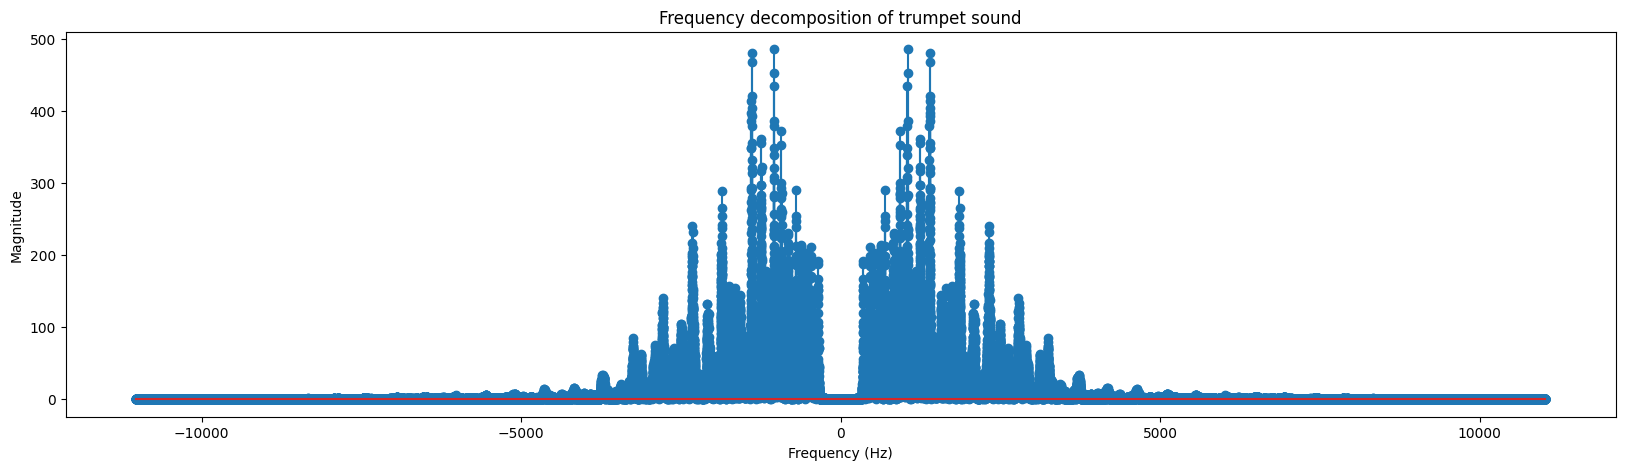

In [ ]:
# FFT for trumpet
y, sr = librosa.load(trumpet_path)

# Perform FFT
fft_vals = np.absolute(np.fft.fft(y))

# Get frequencies corresponding to signal PSD
freqs = np.fft.fftfreq(len(fft_vals), 1/sr)

# Plot the results
plt.figure(figsize=(20,5))
plt.stem(freqs, fft_vals)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Frequency decomposition of trumpet sound')
plt.show()

## Analyzing a song

In the next task, you need to use the recording of a famous Ukrainian song attached on cms. Your creativity is not limited here so any better ways to filter noise, compelling visuals, more advanced algorithms on top of FFT or spectrogram, and explanations will be rewarded.     


In [ ]:
%env DATA_PERMALINK=https://raw.githubusercontent.com/andylvua/la_lab2_data/main/data/piano_melody.mp3

!wget -nc $DATA_PERMALINK -P ./content # type: ignore

env: DATA_PERMALINK=https://raw.githubusercontent.com/andylvua/la_lab2_data/main/data/piano_melody.mp3
--2023-04-06 19:13:27--  https://raw.githubusercontent.com/andylvua/la_lab2_data/main/data/piano_melody.mp3
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 920071 (899K) [audio/mpeg]
Saving to: ‘./content/piano_melody.mp3’

piano_melody.mp3    100%[===================>] 898.51K  --.-KB/s    in 0.03s   

2023-04-06 19:13:27 (27.7 MB/s) - ‘./content/piano_melody.mp3’ saved [920071/920071]



1.   Load the recording, replay it, and plot in the time domain. To get a better view of how the notes change throughout a shorter time, choose a sample of the audio up to 5 seconds and plot it in the time domain. From here on out you will be working with this smaller 5-second sample.


In [ ]:
# Loading sound
path = './content/piano_melody.mp3'
samples, sampling_rate = librosa.load(path)
Audio(path)

#Creating a 5-second sample of the audio
# Extracting a 5-second sample
samples = samples[sampling_rate*2:sampling_rate*7] 
Audio(samples, rate=sampling_rate)

2.   Build a spectrogram of the sample. Explain what domain the spectrogram represents us and how can it be useful.


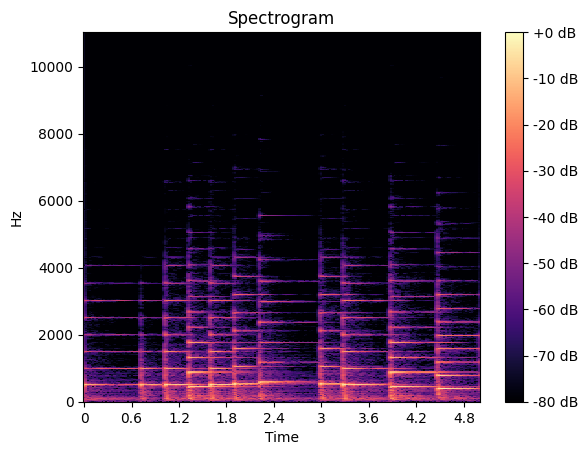

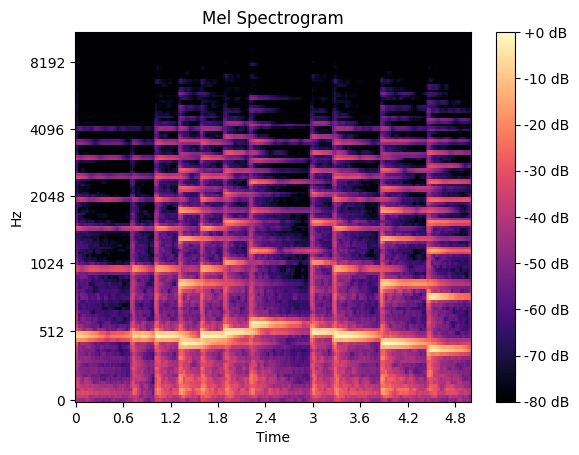

In [ ]:
# Compute spectrogram
spectrogram = np.abs(librosa.stft(samples))

# Convert to dB scale
spectrogram_db = librosa.amplitude_to_db(spectrogram, ref=np.max)

# Plot the spectrogram
librosa.display.specshow(spectrogram_db, x_axis='time', y_axis='linear', sr=sampling_rate, hop_length=512)
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()

# Compute Mel spectrogram
spectrogram = librosa.feature.melspectrogram(y=samples, sr=sampling_rate)

# Convert to dB scale
spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)

# Plot the Mel spectrogram
librosa.display.specshow(spectrogram_db, x_axis='time', y_axis='mel', sr=sampling_rate, hop_length=512)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.show()

The spectrogram represents the frequency domain of the audio signal over time. It is a visual representation of how the spectral content of the audio changes over time. Each column in the spectrogram represents a short-time Fourier transform (STFT) of the audio signal at a specific time, and each row represents a frequency bin. The color in each cell represents the magnitude of the frequency component in dB.

Spectrograms are useful for visualizing the frequency content of audio signals and for identifying specific features in the audio. They are commonly used in audio processing tasks such as music transcription, speech recognition, and audio classification.

3.   Transform signal to the frequency domain with FFT and study the distribution of pitches (frequencies).
Observe that the melody contains only a couple of distinct sounds, but there are a lot more spikes in the frequency domain.

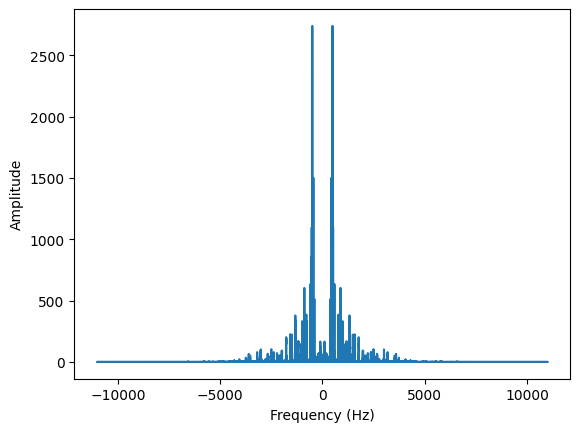

In [ ]:
# Applying FFT to the audio signal
freq_domain = np.fft.fft(samples)

# Creating the frequency axis
freq_axis = np.fft.fftfreq(len(samples), d=1/sampling_rate)

# Plotting the frequency domain
plt.plot(freq_axis, np.abs(freq_domain))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()

4.    Find typical piano notes frequencies table and suggest a way of filtering noise. (Hint: minimum pitch for a piano is 27.5 Herz)  


\begin{array}{|c|c|}
Note     & Frequency (Hz)  \\
A0       & 27.5            \\
A\#0/B♭0 & 29.14           \\
B0       & 30.87           \\
C1       & 32.70           \\
C\#1/D♭1 & 34.65           \\
D1       & 36.71           \\
D\#1/E♭1 & 38.89           \\
E1       & 41.20           \\
F1       & 43.65           \\
F\#1/G♭1 & 46.25           \\
G1       & 49.00           \\
G\#1/A♭1 & 51.91           \\
A1       & 55.00           \\
A\#1/B♭1 & 58.27           \\
B1       & 61.74           \\
C2       & 65.41           \\
C\#2/D♭2 & 69.30           \\
D2       & 73.42           \\
D\#2/E♭2 & 77.78           \\
E2       & 82.41           \\
F2       & 87.31           \\
F\#2/G♭2 & 92.50           \\
G2       & 98.00           \\
G\#2/A♭2 & 103.83          \\
A2       & 110.00          \\
A\#2/B♭2 & 116.54          \\
B2       & 123.47          \\
C3       & 130.81          \\
C\#3/D♭3 & 138.59          \\
D3       & 146.83          \\
D\#3/E♭3 & 155.56          \\
E3       & 164.81          \\
F3       & 174.61          \\
F\#3/G♭3 & 185.00          \\
G3       & 196.00          \\
G\#3/A♭3 & 207.65          \\
A3       & 220.00          \\
A\#3/B♭3 & 233.08          \\
B3       & 246.94          \\
C4       & 261.63          \\
C\#4/D♭4 & 277.18          \\
D4       & 293.66          \\
D\#4/E♭4 & 311.13          \\
E4       & 329.63          \\
F4       & 349.23          \\
F\#4/G♭4 & 369.99          \\
G4       & 392.00          \\
G\#4/A♭4 & 415.30          \\
A4       & 440.00          \\
A\#4/B♭4 & 466.16          \\
B4       & 493.88          \\
C5       & 523.25          \\
C\#5/D♭5 & 554.37          \\
D5       & 587.33          \\
D\#5/E♭5 & 622.25          \\
E5       & 659            
\end{array}

We will later need a map between the notes and their frequencies. We can use the logarithmic scale to map the frequencies to the notes. The formula for mapping the frequencies to the notes is given below:
\begin{equation}
\text{Frequency} = \text{Note} \times 2^{\frac{N}{12}}
\end{equation}
where $N$ is the number of semitones from the starting note. We will start from the lowest note and using the formula above, we will calculate the frequencies of all the notes in the piano. We will then create a dictionary that maps the frequencies to the notes.

In [ ]:
# Creating a dictionary that maps the frequencies to the notes
A4 = 440
C0 = A4 * pow(2, -4.75)

octaves = 8

notes = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']
piano_notes = {}

for octave in range(octaves):
    for note in notes:
        note_name = note + str(octave)
        piano_notes[note_name] = C0 * pow(2, octave + notes.index(note) / 12)

piano_notes = {round(value, 2): key for key, value in piano_notes.items()}

To filter out noise from the frequency domain plot, we can apply a band-pass filter to keep only the frequency components that correspond to the notes of the piano melody. We can set the lower cut-off frequency of the band-pass filter to 27.5 Hz to ensure that only frequencies corresponding to piano notes are passed through the filter.
In addition to a band-pass filter, there are several other types of filters that could be used to process the piano melody signal (such as High-pass filter and Low-pass filter)

5. Apply averaging to the initial signal. Averaging is a procedure that reduces number of samples by taking mean of each n of our samples. Experiment with n and determine whichever will work best to both reduce the noise and not loose any information. You can propose other ways to efficiently denoise the signal.

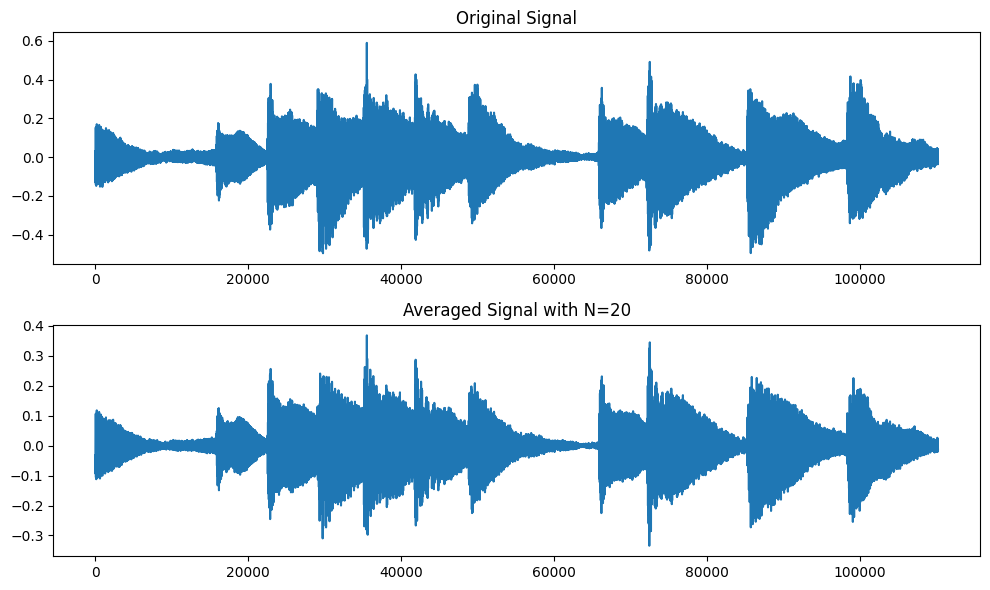

Original Signal


Averaged Signal with N=10


Averaged Signal with N=5


Averaged Signal with N=20


Averaged Signal with N=30


In [ ]:
from scipy.signal import convolve

def averaging(samples, N):
    # Create moving average filter kernel
    kernel = np.ones(N) / N

    # Convolve signal with filter kernel
    y_conv = convolve(samples, kernel, mode='same')
    return y_conv


# Plot original and averaged signals
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(samples)
plt.title('Original Signal')
plt.subplot(2, 1, 2)
plt.plot(averaging(samples, 20))
plt.title('Averaged Signal with N=20')
plt.tight_layout()
plt.show()

# Play original and averaged signals
print('Original Signal')
display(Audio(samples, rate=sampling_rate))

print('Averaged Signal with N=10')
display(Audio(averaging(samples, 10), rate=sampling_rate))

print('Averaged Signal with N=5')
display(Audio(averaging(samples, 5), rate=sampling_rate))

print('Averaged Signal with N=20')
display(Audio(averaging(samples, 20), rate=sampling_rate))

print('Averaged Signal with N=30')
display(Audio(averaging(samples, 30), rate=sampling_rate))



As for me, the plots above show that the best value for N is 20. The signal is not too noisy and the information is not lost.
But actually, the sound I like the most is the one with N=5. It sounds more natural to me. I think it is because the original signal is not spoiled by noise, so averaging on bigger N is just damaging the signal.

6. Match fundamental pitches you discovered to the standard note frequencies and display them in a table like the one outlined below.

|Detected frequency(Hz) | Assigned frequency(Hz) | Output note|   
|:---------------------:|:----------------------:|:----------:|
|393.2 |391.9| G4  

In [ ]:
from scipy.signal import find_peaks

# Finding the fundamental frequencies of the sample
freq_domain = fft(samples)
frequencies = fftfreq(len(freq_domain), 1 / sampling_rate)

# Filter out the frequencies that are not piano notes
piano_notes_freq = list(piano_notes.keys())
piano_notes_freq.sort()
piano_notes_freq = np.array(piano_notes_freq)

mask = (piano_notes_freq > 27.5) & (piano_notes_freq < 4186.01)
piano_notes_freq = piano_notes_freq[mask]

# Find main peaks
peaks = find_peaks(freq_domain, height=300, distance=10)[0]

# Find the main frequencies
main_freqs = frequencies[peaks]
main_freqs = main_freqs[main_freqs > 0]

# Find the closest piano note for each frequency and assign it to the frequency
assigned_freqs = []
for freq in main_freqs:
    assigned_freqs.append(piano_notes_freq[np.argmin(np.abs(piano_notes_freq - freq))])

assigned_freqs = np.array(assigned_freqs)

print('Detected frequency(Hz)\tAssigned frequency(Hz)\tOutput note')
for i in range(len(main_freqs)):
    print(f'{round(main_freqs[i], 1)} \t\t\t\t\t{round(assigned_freqs[i], 1)} \t\t\t\t\t{piano_notes[assigned_freqs[i]]}')




Detected frequency(Hz)	Assigned frequency(Hz)	Output note
392.8 					392.0 					G4
439.6 					440.0 					A4
441.6 					440.0 					A4
494.2 					493.9 					B4
522.8 					523.2 					C5
586.8 					587.3 					D5
784.6 					784.0 					G5
882.4 					880.0 					A5


/usr/local/lib/python3.9/dist-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


## Summary

1. What is Fourier transform? How can it be used in signal processing?

The Fourier transform is a mathematical tool that analyzes a signal by decomposing it into its frequency components. It is used in signal processing to extract useful information from signals, such as identifying the frequency content of a signal, filtering out unwanted noise, and compressing data. The output of the Fourier transform is a complex-valued function of frequency, which provides a representation of the signal in the frequency domain.

2. What are time and frequency domains and how can they be useful?

Time domain and frequency domain are two ways to represent signals. In the time domain, a signal is represented as a function of time, while in the frequency domain, a signal is represented as a sum of sinusoidal functions of different frequencies and amplitudes.

The time domain representation is useful for understanding how a signal changes over time, and for analyzing its behavior in the time dimension. The frequency domain representation is useful for understanding the spectral content of a signal, including its harmonic components, and for analyzing its behavior in the frequency dimension.

3. What is averaging and what is its purpose?

Averaging is a signal processing technique that involves reducing noise in a signal by taking the average of several samples. The purpose of averaging is to reduce the impact of random fluctuations or noise in the signal, while preserving the underlying signal information.